In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator

In [2]:
path = 'D:/Hand_Gestures_750/'
train_path = path + 'train'
test_path = path + 'test'
valid_path = path + 'valid'

In [3]:
IMG_SHAPE = (224, 224)

In [4]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

valid_datagen = ImageDataGenerator(rescale = 1./255)

train_dataset = train_datagen.flow_from_directory(train_path,
                                                 target_size = IMG_SHAPE,
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

valid_dataset = valid_datagen.flow_from_directory(valid_path,
                                            target_size = IMG_SHAPE,
                                            batch_size = 32,
                                            class_mode = 'categorical')

test_dataset = valid_datagen.flow_from_directory(test_path,
                                            target_size = IMG_SHAPE,
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 3600 images belonging to 6 classes.
Found 600 images belonging to 6 classes.
Found 300 images belonging to 6 classes.


In [5]:
base_model = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE + (3,),
                                               include_top=False,
                                               weights='imagenet')

In [6]:
base_model.trainable = False

In [7]:
x = tf.keras.layers.Flatten()(base_model.output)
outputs = tf.keras.layers.Dense(6, activation='softmax')(x)
model = tf.keras.Model(base_model.input, outputs)

In [8]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [9]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                                             

In [10]:
len(model.trainable_variables)

2

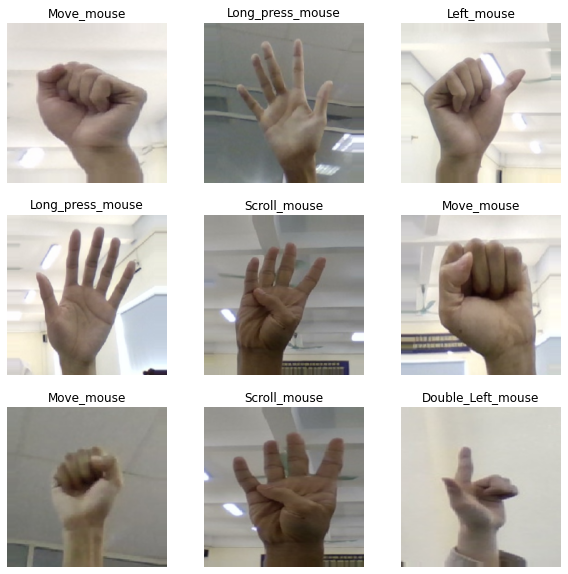

In [13]:
class_names = list(train_dataset.class_indices.keys())

plt.figure(figsize=(10, 10))
images, labels = train_dataset[0]
labels = labels.tolist()
for i in range(9):
  ax = plt.subplot(3, 3, i + 1)
  plt.imshow(images[i])
  plt.title(class_names[labels[i].index(1)])
  plt.axis("off")

In [14]:
history = model.fit(train_dataset,
                    epochs= 2,
                    validation_data=valid_dataset)

Epoch 1/2
113/113 [==============================] - 150s 1s/step - loss: 0.2761 - accuracy: 0.9072 - val_loss: 0.0504 - val_accuracy: 0.9850
Epoch 2/2
113/113 [==============================] - 149s 1s/step - loss: 0.0224 - accuracy: 0.9944 - val_loss: 0.0194 - val_accuracy: 0.9967


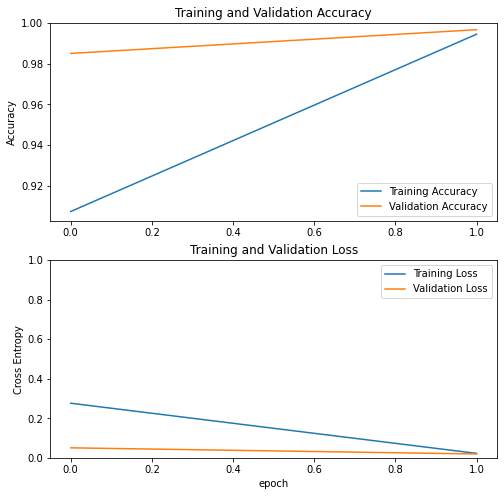

In [15]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

1/1 [==============================] - 2s 2s/step


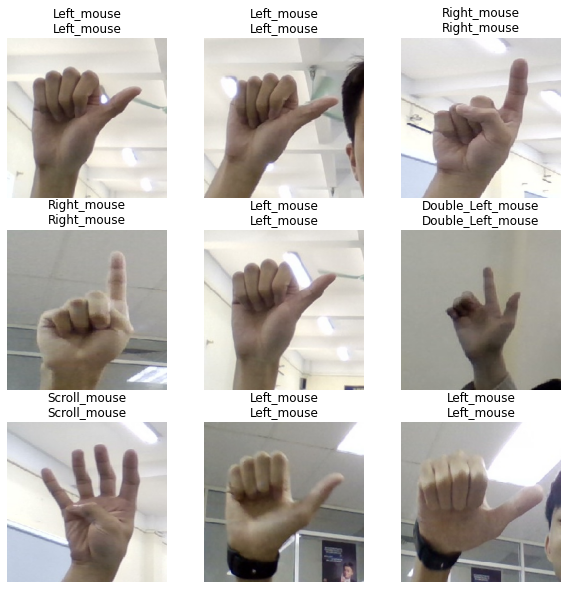

In [ ]:
class_names = list(test_dataset.class_indices.keys())

plt.figure(figsize=(10, 10))
k = 4
images, labels = test_dataset[k]
labels = labels.tolist()
labels_test = model.predict(test_dataset[k][0]).tolist()
for i in range(9):
  ax = plt.subplot(3, 3, i + 1)
  plt.imshow(images[i])
  plt.title(class_names[labels[i].index(1)] + '\n' + class_names[labels_test[i].index(max(labels_test[i]))])
  plt.axis("off")

In [ ]:
model.save('Hand_Gestures_750_model.h5')